In [130]:
%matplotlib inline
import pickle
import string
import sys
import numpy as np
import matplotlib.pyplot as plt

# Q6

A. Load the data from the .pkl file

In [204]:
with open('TrainData.pkl', 'rb') as file:
    data = pickle.load(file)
X = data['X']
Y = data['Y']

B. Printing of each of the letters with its example

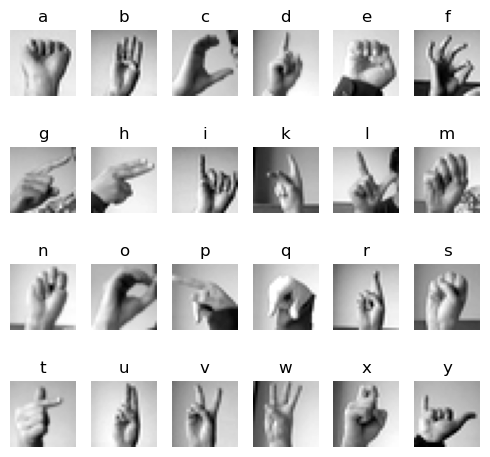

In [205]:
Letters = list(string.ascii_lowercase)

# Create a 4x6 subplot grid with a specified figure size
fig, axes = plt.subplots(4, 6, figsize=(5, 5))


for i, ax in enumerate(axes.ravel(), 1):

    # Adjust the letter index for Python's 0-based indexing 
    # and skip the letter 'j'
    letter = i - 1 if i < 10 else i
    if letter != 9:

        # Get the index of the first occurrence of the letter
        index = np.where(Y == letter)[0][0]  
        ax.imshow(X[:, :, index], cmap='gray')
        ax.axis('off')  # Turn off axis numbers

        # Set the title of the subplot to the corresponding letter
        ax.set_title(Letters[letter])
    else:
        ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.05)

# Adjust the layout to make room for titles
plt.tight_layout()  
plt.show()

C. Defining the matrix in a new way

In [187]:
X = X.reshape(784,27455).T

# Q8

In [134]:
def findMeu(x,y):

    # Get unique labels in y
    labels= np.unique(y)

    # Initialize meuML matrix with zeros
    meuML = np.zeros((len(labels), len(X[1])), dtype=float)
    for label,c in enumerate(labels):

        # Find indices where y equals the current label
        index = np.where(y==c)
        xc = x[index]

        # Calculate the mean for each column of xc and store it in meuML
        for col in range(len(X[1])):
            meuML[label,col] = np.mean(xc[:,col]) 
    return meuML

In [135]:
def findpi(y):

    # Get unique labels in y
    labels= np.unique(y)
    pi = np.zeros(len(labels), dtype=float)
    for i,label in enumerate(labels):

        # Find indices where y equals the current label
        indx = np.where(y==label)[0]

         # Calculate the probability of the current label
        pi[i] = len(indx)/len(y)
    return pi,labels

In [136]:
def findSigma(x,y,mueML):
    sigmaML = []

     # Get unique labels in y
    labels= np.unique(y)
    for i,c in enumerate(labels):
        Xc = x [y==c]

         # Calculate the covariance matrix for Xc
        sigmaML.append(np.cov(Xc, rowvar=False))
    return sigmaML

In [137]:
def findInversSigma(sigma):
    inverseSSigma = []
    for i in range(len(sigma)):
        inverseSSigma.append(np.linalg.inv(sigma[i]))
    return inverseSSigma

In [138]:
def makeLamda(sigma):
    sumLamda = []
    for i in range(len(sigma)):
        sumLamda.append(np.sum(np.log(np.linalg.eigvals(sigma[i]))))
    return sumLamda


A. Calculation of maximum likelihood for each parameter:

In [139]:
mue = findMeu(X,Y)
y_pi,labels = findpi(Y)
sig = findSigma(X,Y,mue)
sumlamda = makeLamda(sig)
inverset = findInversSigma(sig)

B. Function argmax:

In [140]:
def findArgmax(x,mue,pi,labels,lamda,inverstSig):
    p = []
    for i in range(len(labels)):
        part2 = (x - mue[i]).T @ inverstSig[i] @ (x - mue[i])
        p.append(-0.5 * lamda[i] -0.5 * part2 + np.log(pi[i]) )
    indx = np.argmax(p)
    return labels[indx]


In [141]:
# y_prediction - An array containing a prediction for each of the examples
y_prediction=[]
for i in range(len(Y)):
    y_prediction.append(findArgmax(X[i],mue,y_pi,labels,sumlamda,inverset))

C. Representing each of the mean vectors as an image:

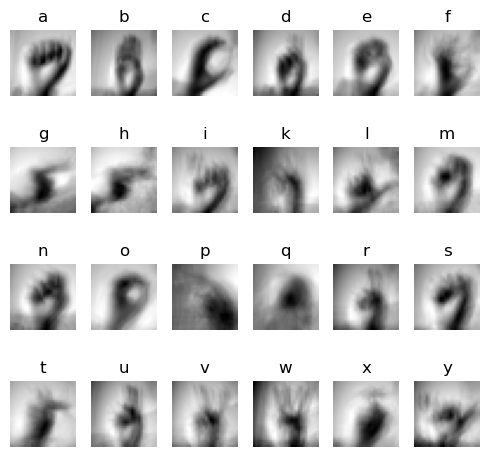

In [142]:
Letters = [letter for letter in string.ascii_lowercase if letter != 'j']
fig, axes = plt.subplots(4, 6, figsize=(5, 5))
for i, ax in enumerate(axes.ravel(), 1):  # Start enumeration from 1
    letter = i - 1
    ax.imshow(mue[letter].reshape(28,28), cmap='gray')
    ax.axis('off')  # Turn off axis numbers
    ax.set_title(Letters[letter])
    ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.tight_layout()  # Adjust the layout to make room for titles
plt.show()

# Q7 

In [175]:
def calculateConfusionMatrix(Yprediction,Ytrue):
    result = {}
    for i,label in enumerate(np.unique(Yprediction)):
        true_pos = np.sum(np.logical_and(Yprediction == Ytrue,Ytrue == label))
        true_neg = np.sum(np.logical_and(Yprediction != label,Ytrue != label))
        false_pos = np.sum(np.logical_and(Yprediction == label, Ytrue != label))
        false_neg = np.sum(np.logical_and(Yprediction != Ytrue, Ytrue == label))
        result[label] = {'TP' : true_pos,'TN' : true_neg,'FP' : false_pos,'FN' : false_neg}
    return result


In [191]:
confusionMatrix = calculateConfusionMatrix(y_prediction,Y)
print(confusionMatrix)

{0: {'TP': 1126, 'TN': 26329, 'FP': 0, 'FN': 0}, 1: {'TP': 1010, 'TN': 26445, 'FP': 0, 'FN': 0}, 2: {'TP': 1144, 'TN': 26311, 'FP': 0, 'FN': 0}, 3: {'TP': 1196, 'TN': 26259, 'FP': 0, 'FN': 0}, 4: {'TP': 957, 'TN': 26498, 'FP': 0, 'FN': 0}, 5: {'TP': 1204, 'TN': 26251, 'FP': 0, 'FN': 0}, 6: {'TP': 1090, 'TN': 26365, 'FP': 0, 'FN': 0}, 7: {'TP': 1013, 'TN': 26442, 'FP': 0, 'FN': 0}, 8: {'TP': 1162, 'TN': 26293, 'FP': 0, 'FN': 0}, 10: {'TP': 1114, 'TN': 26341, 'FP': 0, 'FN': 0}, 11: {'TP': 1241, 'TN': 26214, 'FP': 0, 'FN': 0}, 12: {'TP': 1055, 'TN': 26400, 'FP': 0, 'FN': 0}, 13: {'TP': 1151, 'TN': 26304, 'FP': 0, 'FN': 0}, 14: {'TP': 1196, 'TN': 26259, 'FP': 0, 'FN': 0}, 15: {'TP': 1088, 'TN': 26367, 'FP': 0, 'FN': 0}, 16: {'TP': 1279, 'TN': 26176, 'FP': 0, 'FN': 0}, 17: {'TP': 1294, 'TN': 26161, 'FP': 0, 'FN': 0}, 18: {'TP': 1199, 'TN': 26256, 'FP': 0, 'FN': 0}, 19: {'TP': 1186, 'TN': 26269, 'FP': 0, 'FN': 0}, 20: {'TP': 1161, 'TN': 26294, 'FP': 0, 'FN': 0}, 21: {'TP': 1082, 'TN': 26373,

A. Accuracy:

In [145]:
def findAccuracy(confusionMat):
    result = []
    for label in confusionMat:
        tp = confusionMat[label]['TP']
        tn = confusionMat[label]['TN']
        fn = confusionMat[label]['FN']
        fp = confusionMat[label]['FP']
        result.append((tp + tn)/(tp +tn +fn + fp))
    return result

In [177]:
accuracy = findAccuracy(confusionMatrix)
for i in range(len(accuracy)):
    print(f"Letter : {Letters[i]} - Accuracy : {accuracy[i]}")

Letter : a - Accuracy : 1.0
Letter : b - Accuracy : 1.0
Letter : c - Accuracy : 1.0
Letter : d - Accuracy : 1.0
Letter : e - Accuracy : 1.0
Letter : f - Accuracy : 1.0
Letter : g - Accuracy : 1.0
Letter : h - Accuracy : 1.0
Letter : i - Accuracy : 1.0
Letter : k - Accuracy : 1.0
Letter : l - Accuracy : 1.0
Letter : m - Accuracy : 1.0
Letter : n - Accuracy : 1.0
Letter : o - Accuracy : 1.0
Letter : p - Accuracy : 1.0
Letter : q - Accuracy : 1.0
Letter : r - Accuracy : 1.0
Letter : s - Accuracy : 1.0
Letter : t - Accuracy : 1.0
Letter : u - Accuracy : 1.0
Letter : v - Accuracy : 1.0
Letter : w - Accuracy : 1.0
Letter : x - Accuracy : 1.0
Letter : y - Accuracy : 1.0


B. Confusion matrix:

In [178]:
from tabulate import tabulate
def plotMatrix(confusion_matrix):
    letters = [c for c in string.ascii_lowercase if c != 'j']
    for i, (index, params) in enumerate(confusion_matrix.items()):
        if i == 9 : continue
        else: 
            if 1 >9: i = i-1
            data = [
                ["","Predicted Class"],
                ["True Class", "Yes", "No"],
                ["Yes", params['TP'], params['FN']],
                ["No", params['FP'], params['TN']]
            ]
            table_with_title = f"{letters[i]}\n{tabulate(data)}"
            print(table_with_title)
            print('\n')

In [179]:
plotMatrix(confusionMatrix)

a
----------  ---------------  -----
            Predicted Class
True Class  Yes              No
Yes         1126             0
No          0                26329
----------  ---------------  -----


b
----------  ---------------  -----
            Predicted Class
True Class  Yes              No
Yes         1010             0
No          0                26445
----------  ---------------  -----


c
----------  ---------------  -----
            Predicted Class
True Class  Yes              No
Yes         1144             0
No          0                26311
----------  ---------------  -----


d
----------  ---------------  -----
            Predicted Class
True Class  Yes              No
Yes         1196             0
No          0                26259
----------  ---------------  -----


e
----------  ---------------  -----
            Predicted Class
True Class  Yes              No
Yes         957              0
No          0                26498
----------  ---------------  -----




C. Calculating precision and recall:

In [180]:
def precision_recall(confusionMat):
    precision = []
    recall = []
    for label in confusionMat:
        tp = confusionMat[label]['TP']
        fn = confusionMat[label]['FN']
        fp = confusionMat[label]['FP']
        if tp+fp != 0 :
            if tp+fn != 0 :
                precision.append(tp/(tp + fp))
                recall.append(tp/(tp +fn))
    return precision,recall

In [181]:
Letters = [letter for letter in string.ascii_lowercase if letter != 'j']
precision, recall = precision_recall(confusionMatrix)
for i in range(len(precision)):
    print(f"Letter : {Letters[i]} - Precision : {precision[i]}, Recall : {recall[i]}")

Letter : a - Precision : 1.0, Recall : 1.0
Letter : b - Precision : 1.0, Recall : 1.0
Letter : c - Precision : 1.0, Recall : 1.0
Letter : d - Precision : 1.0, Recall : 1.0
Letter : e - Precision : 1.0, Recall : 1.0
Letter : f - Precision : 1.0, Recall : 1.0
Letter : g - Precision : 1.0, Recall : 1.0
Letter : h - Precision : 1.0, Recall : 1.0
Letter : i - Precision : 1.0, Recall : 1.0
Letter : k - Precision : 1.0, Recall : 1.0
Letter : l - Precision : 1.0, Recall : 1.0
Letter : m - Precision : 1.0, Recall : 1.0
Letter : n - Precision : 1.0, Recall : 1.0
Letter : o - Precision : 1.0, Recall : 1.0
Letter : p - Precision : 1.0, Recall : 1.0
Letter : q - Precision : 1.0, Recall : 1.0
Letter : r - Precision : 1.0, Recall : 1.0
Letter : s - Precision : 1.0, Recall : 1.0
Letter : t - Precision : 1.0, Recall : 1.0
Letter : u - Precision : 1.0, Recall : 1.0
Letter : v - Precision : 1.0, Recall : 1.0
Letter : w - Precision : 1.0, Recall : 1.0
Letter : x - Precision : 1.0, Recall : 1.0
Letter : y 

# Test:

## Q6

A. Load the data from the .pkl file

In [184]:
with open('TestData.pkl', 'rb') as file:
    data = pickle.load(file)
X_test = data['X']
Y_test = data['Y']

B. Printing of each of the letters with its example

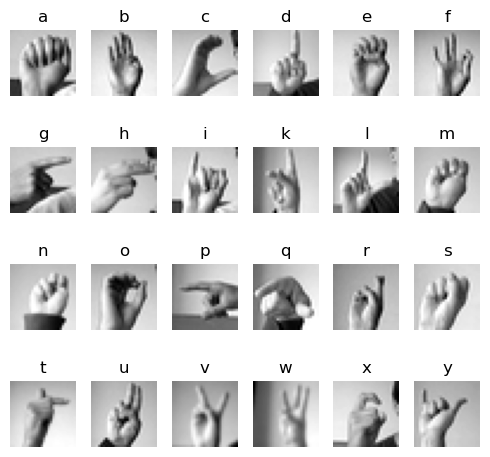

In [186]:
Letters = list(string.ascii_lowercase)
fig, axes = plt.subplots(4, 6, figsize=(5, 5))
for i, ax in enumerate(axes.ravel(), 1):  # Start enumeration from 1
    letter = i - 1 if i < 10 else i
    if letter != 9:
        index = np.where(Y_test == letter)[0][0]  # Get the index of the first occurrence of the letter
        ax.imshow(X_test[:, :, index], cmap='gray')
        ax.axis('off')  # Turn off axis numbers
        ax.set_title(Letters[letter])
    else:
        ax.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.tight_layout()  # Adjust the layout to make room for titles
plt.show()

C. Defining the matrix in a new way

In [189]:
X_test = X_test.reshape(784,-1).T

In [153]:
print("Original shape of X_test:", X_test.shape)
X_test = X_test.reshape(784, -1).T
print("New shape of X_test after reshaping:", X_test.shape)

Original shape of X_test: (28, 28, 5101)
New shape of X_test after reshaping: (5101, 784)


## Q7 

In [194]:
y_calculate=[]
test = len(Y_test)
for i in range(test):
    y_calculate.append(findArgmax(X_test[i],mue,y_pi,labels,sumlamda,inverset))

In [206]:
confusionMatrix = calculateConfusionMatrix(y_calculate,Y_test)
print(confusionMatrix)

{0: {'TP': 331, 'TN': 4770, 'FP': 0, 'FN': 0}, 1: {'TP': 270, 'TN': 4810, 'FP': 0, 'FN': 21}, 2: {'TP': 289, 'TN': 4808, 'FP': 0, 'FN': 4}, 3: {'TP': 226, 'TN': 4866, 'FP': 4, 'FN': 5}, 4: {'TP': 191, 'TN': 4867, 'FP': 0, 'FN': 43}, 5: {'TP': 245, 'TN': 4856, 'FP': 0, 'FN': 0}, 6: {'TP': 246, 'TN': 4830, 'FP': 7, 'FN': 18}, 7: {'TP': 168, 'TN': 4893, 'FP': 0, 'FN': 40}, 8: {'TP': 227, 'TN': 4866, 'FP': 0, 'FN': 8}, 10: {'TP': 228, 'TN': 4853, 'FP': 3, 'FN': 17}, 11: {'TP': 188, 'TN': 4908, 'FP': 0, 'FN': 5}, 12: {'TP': 159, 'TN': 4903, 'FP': 0, 'FN': 39}, 13: {'TP': 214, 'TN': 4845, 'FP': 29, 'FN': 13}, 14: {'TP': 168, 'TN': 4922, 'FP': 4, 'FN': 7}, 15: {'TP': 64, 'TN': 4986, 'FP': 0, 'FN': 51}, 16: {'TP': 164, 'TN': 4741, 'FP': 196, 'FN': 0}, 17: {'TP': 140, 'TN': 4915, 'FP': 46, 'FN': 0}, 18: {'TP': 226, 'TN': 4825, 'FP': 48, 'FN': 2}, 19: {'TP': 145, 'TN': 4932, 'FP': 7, 'FN': 17}, 20: {'TP': 163, 'TN': 4926, 'FP': 0, 'FN': 12}, 21: {'TP': 105, 'TN': 4952, 'FP': 0, 'FN': 44}, 22: {'

A. Accuracy:

In [200]:
accuracy = findAccuracy(confusionMatrix)
for i in range(len(accuracy)):
    print(f"Letter : {Letters[i]} - Accuracy : {accuracy[i]:.3f}")

Letter : a - Accuracy : 1.000
Letter : b - Accuracy : 0.996
Letter : c - Accuracy : 0.999
Letter : d - Accuracy : 0.998
Letter : e - Accuracy : 0.992
Letter : f - Accuracy : 1.000
Letter : g - Accuracy : 0.995
Letter : h - Accuracy : 0.992
Letter : i - Accuracy : 0.998
Letter : k - Accuracy : 0.996
Letter : l - Accuracy : 0.999
Letter : m - Accuracy : 0.992
Letter : n - Accuracy : 0.992
Letter : o - Accuracy : 0.998
Letter : p - Accuracy : 0.990
Letter : q - Accuracy : 0.962
Letter : r - Accuracy : 0.991
Letter : s - Accuracy : 0.990
Letter : t - Accuracy : 0.995
Letter : u - Accuracy : 0.998
Letter : v - Accuracy : 0.991
Letter : w - Accuracy : 0.992
Letter : x - Accuracy : 0.997
Letter : y - Accuracy : 0.995


B. Confusion matrix:

In [197]:
plotMatrix(confusionMatrix)

a
----------  ---------------  ----
            Predicted Class
True Class  Yes              No
Yes         331              0
No          0                4770
----------  ---------------  ----


b
----------  ---------------  ----
            Predicted Class
True Class  Yes              No
Yes         270              21
No          0                4810
----------  ---------------  ----


c
----------  ---------------  ----
            Predicted Class
True Class  Yes              No
Yes         289              4
No          0                4808
----------  ---------------  ----


d
----------  ---------------  ----
            Predicted Class
True Class  Yes              No
Yes         226              5
No          4                4866
----------  ---------------  ----


e
----------  ---------------  ----
            Predicted Class
True Class  Yes              No
Yes         191              43
No          0                4867
----------  ---------------  ----


f
---------- 

C. Calculating precision and recall:

In [199]:
Letters = [letter for letter in string.ascii_lowercase if letter != 'j']
precision, recall = precision_recall(confusionMatrix)
for i in range(len(precision)):
    print(f"Letter : {Letters[i]} - Precision : {precision[i]:.3f}, Recall : {recall[i]:.3f}")

Letter : a - Precision : 1.000, Recall : 1.000
Letter : b - Precision : 1.000, Recall : 0.928
Letter : c - Precision : 1.000, Recall : 0.986
Letter : d - Precision : 0.983, Recall : 0.978
Letter : e - Precision : 1.000, Recall : 0.816
Letter : f - Precision : 1.000, Recall : 1.000
Letter : g - Precision : 0.972, Recall : 0.932
Letter : h - Precision : 1.000, Recall : 0.808
Letter : i - Precision : 1.000, Recall : 0.966
Letter : k - Precision : 0.987, Recall : 0.931
Letter : l - Precision : 1.000, Recall : 0.974
Letter : m - Precision : 1.000, Recall : 0.803
Letter : n - Precision : 0.881, Recall : 0.943
Letter : o - Precision : 0.977, Recall : 0.960
Letter : p - Precision : 1.000, Recall : 0.557
Letter : q - Precision : 0.456, Recall : 1.000
Letter : r - Precision : 0.753, Recall : 1.000
Letter : s - Precision : 0.825, Recall : 0.991
Letter : t - Precision : 0.954, Recall : 0.895
Letter : u - Precision : 1.000, Recall : 0.931
Letter : v - Precision : 1.000, Recall : 0.705
Letter : w - 

message:

In [155]:
with open('MessageData.pkl', 'rb') as file:
    data = pickle.load(file)
X_message = data['X']
X_message = X_message.reshape(784, -1).T

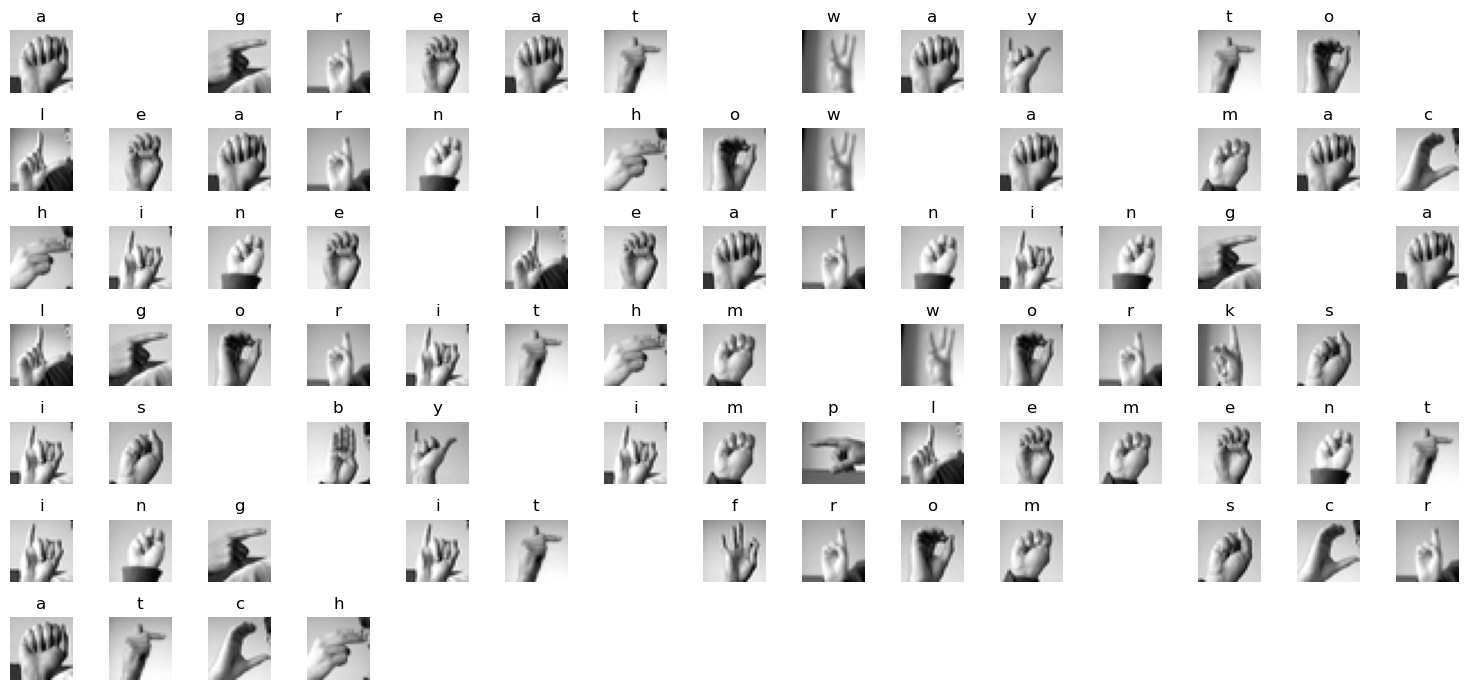

In [156]:
Letters = string.ascii_lowercase
fig, axes = plt.subplots(7, 15, figsize=(15, 7))
for i, ax in enumerate(axes.ravel(), 0): 
    if i < len(X_message):
        if np.all(X_message[i]==0):
            ax.text(0.5, 0.5, ' ', ha='center', va='center', fontsize=20)
            ax.axis('off') 
        else:
            y = findArgmax(X_message[i],mue,y_pi,labels,sumlamda,inverset)
            ax.imshow(X_message[i].reshape(28,28), cmap='gray')
            ax.axis('off')  # Turn off axis numbers
            ax.set_title(Letters[y])
            ax.axis('off')
    else:
        ax.axis('off') 

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.tight_layout()  # Adjust the layout to make room for titles
plt.show()